In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import time

# Batch Gradient Descent (BGD)

### Definition:
**BGD computes the gradient of the cost function with respect to the parameters for the entire training dataset.**
### Process:
* **Compute Gradient:** Calculate the gradient of the cost function with respect to the parameters using the entire training dataset.
* **Update Weights:** Update the parameters (weights) in the opposite direction of the gradient to minimize the cost function.
### Advantages:
* **Stable Convergence:** Consistently moves toward the global minimum as updates are averaged over the entire dataset.
* **Smooth Updates:** Loss function exhibits smooth, predictable changes, making it easier to tune hyperparameters.
* **Well-Suited for Small Datasets:** Efficient when the entire dataset can fit into memory.
### Disadvantages:
* **Computational Complexity:** Requires storing and processing the entire dataset for each parameter update, making it slow for large datasets.
* **Memory Intensive:** Inefficient memory usage as it requires holding the entire dataset in memory.
* **Prone to Local Minima:** Can get stuck in local minima without frequent updates to escape.

# Stochastic Gradient Descent (SGD)

### Definition: 
**SGD computes the gradient of the cost function and updates the parameters for each training example individually.**
### Process:
* **Compute Gradient:** Calculate the gradient of the cost function with respect to the parameters using a single training example.
* **Update Weights:** Update the parameters (weights) based on the gradient of the cost function for the single training example.
### Advantages:
* **Fast Convergence:** Faster convergence due to frequent updates and the ability to escape local minima more easily.
* **Memory Efficiency:** Requires less memory as it processes one training example at a time.
* **Suitable for Large Datasets:** Efficient for datasets that do not fit into memory as it doesn't require loading the entire dataset.
### Disadvantages:
* **Noisy Updates:** Loss function exhibits significant fluctuations due to updates based on individual examples, making convergence noisy.
* **Less Stable:** Can oscillate around the minimum, hindering hyperparameter tuning and convergence analysis.
* **More Sensitive to Learning Rate:** Requires careful tuning of the learning rate for stability and convergence.

### Reading Dataset

In [5]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df = df[['Age','EstimatedSalary','Purchased']]

In [6]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


### Sampling

In [7]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [8]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


### Standard Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [10]:
X_scaled.shape

(400, 2)

### Importing required libraries

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

2024-05-19 05:33:14.274651: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-19 05:33:14.274801: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-19 05:33:14.446193: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### Creating Model

In [12]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

# Comparing Batch Gradient Descent and Stochastic Gradient Descent

# 1. Time

In [19]:
# Batch Gradient Descent

model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_scaled,y,epochs=10,batch_size=400)
print(time.time() - start)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 865ms/step - accuracy: 0.9225 - loss: 0.2303
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9200 - loss: 0.2287
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9200 - loss: 0.2276
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9225 - loss: 0.2268
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9225 - loss: 0.2262
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9225 - loss: 0.2256
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9225 - loss: 0.2251
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9225 - loss: 0.2247
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9225 - loss: 0.2243
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9225 - loss: 0.2239
1.3380177021026611


In [20]:
# Stochastic Gradient Descent

model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_scaled,y,epochs=10,batch_size=1)
print(time.time() - start)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9331 - loss: 0.1773
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8906 - loss: 0.3248
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9290 - loss: 0.2240
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9107 - loss: 0.2584
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9279 - loss: 0.2493
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9377 - loss: 0.2111
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9290 - loss: 0.2379
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8981 - loss: 0.3201
Epoch 9/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9255 - loss: 0.2961
Epoch 10/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9193 - loss: 0.2924
8.46039342880249


* Time taken by batch gradient descent : 1.3380177021026611
* Time taken by stochastic gradient descent : 8.46039342880249
* Here we come to conclusion that **batch gradient descent is faster than stochastic gradient descent**
* **Reason** : Freuency of weight update is heigher in stochastic gradient descent (400 update / epoch) as compare to batch gradient descent (1 update / epoch)

# 2. Convergence 

In [23]:
# Batch Gradient Descent

model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_scaled,y,epochs=10,batch_size=320,validation_split=0.2)
print(time.time() - start)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9094 - loss: 0.2632 - val_accuracy: 0.9750 - val_loss: 0.1534
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.9094 - loss: 0.2595 - val_accuracy: 0.9750 - val_loss: 0.1562
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.9125 - loss: 0.2571 - val_accuracy: 0.9750 - val_loss: 0.1585
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9125 - loss: 0.2552 - val_accuracy: 0.9750 - val_loss: 0.1605
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.9125 - loss: 0.2537 - val_accuracy: 0.9750 - val_loss: 0.1623
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9125 - loss: 0.2523 - val_accuracy: 0.9750 - val_loss: 0.1640
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.9125 - loss: 0.2510 - val_accuracy: 0.9750 - val_loss: 0.1655
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.9125 - loss: 0.2499 - val_accuracy: 0.9750 - val_loss: 0.16

In [22]:
# Stochastic Gradient Descent

model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_scaled,y,epochs=10,batch_size=1,validation_split=0.2)
print(time.time() - start)

Epoch 1/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8996 - loss: 0.3483 - val_accuracy: 0.9875 - val_loss: 0.1319
Epoch 2/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9140 - loss: 0.2372 - val_accuracy: 0.9875 - val_loss: 0.1349
Epoch 3/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9191 - loss: 0.2592 - val_accuracy: 0.9875 - val_loss: 0.1380
Epoch 4/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9236 - loss: 0.2109 - val_accuracy: 0.9875 - val_loss: 0.1377
Epoch 5/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9232 - loss: 0.2584 - val_accuracy: 0.9875 - val_loss: 0.1431
Epoch 6/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8838 - loss: 0.3704 - val_accuracy: 0.9875 - val_loss: 0.1378
Epoch 7/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8865 - loss: 0.3128 - val_accuracy: 0.9875 - val_loss: 0.1409
Epoch 8/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8912 - loss: 0.3357 - val_accuracy: 0.

* **stochastic gradient descent Converges faster than batch gradient descent**
* **Reason** : It updates weights more frequently, leading to faster learning and more opportunities to escape local minima.

# 3. Behaviour of loss

In [30]:
# Batch Gradient Descent

model.compile(loss='binary_crossentropy',metrics=['accuracy'])
batch_history = model.fit(X_scaled,y,epochs=500,batch_size=320,validation_split=0.2)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 958ms/step - accuracy: 0.9156 - loss: 0.2698 - val_accuracy: 0.8750 - val_loss: 0.3028
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9187 - loss: 0.2601 - val_accuracy: 0.8625 - val_loss: 0.3222
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9187 - loss: 0.2555 - val_accuracy: 0.8625 - val_loss: 0.3364
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9250 - loss: 0.2523 - val_accuracy: 0.8625 - val_loss: 0.3478
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9250 - loss: 0.2499 - val_accuracy: 0.8625 - val_loss: 0.3557
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9250 - loss: 0.2480 - val_accuracy: 0.8625 - val_loss: 0.3611
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9250 - loss: 0.2463 - val_accuracy: 0.8625 - val_loss: 0.3650
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9219 - loss: 0.2449 - val_accuracy: 0.8625 - val_loss

In [31]:
# Stochastic Gradient Descent

model.compile(loss='binary_crossentropy',metrics=['accuracy'])
stochastic_history = model.fit(X_scaled,y,epochs=500,batch_size=1,validation_split=0.2)

Epoch 1/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9414 - loss: 0.1630 - val_accuracy: 0.8625 - val_loss: 0.3387
Epoch 2/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9194 - loss: 0.1832 - val_accuracy: 0.8750 - val_loss: 0.2756
Epoch 3/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9181 - loss: 0.2175 - val_accuracy: 0.8750 - val_loss: 0.2703
Epoch 4/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9217 - loss: 0.1990 - val_accuracy: 0.8750 - val_loss: 0.2717
Epoch 5/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9196 - loss: 0.2101 - val_accuracy: 0.8750 - val_loss: 0.2686
Epoch 6/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9213 - loss: 0.2165 - val_accuracy: 0.8750 - val_loss: 0.3210
Epoch 7/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9129 - loss: 0.2344 - val_accuracy: 0.8750 - val_loss: 0.2679
Epoch 8/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9089 - loss: 0.2687 - val_accu

Text(0.5, 1.0, 'Batch Gradient Descent')

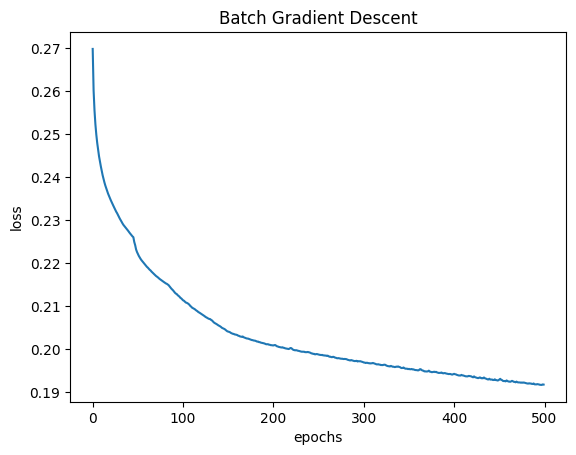

In [33]:
import matplotlib.pyplot as plt
plt.ylabel("loss")
plt.xlabel("epochs")
plt.plot(batch_history.history['loss'])
plt.title("Batch Gradient Descent")

Text(0.5, 1.0, 'Stochastic Gradient Descent')

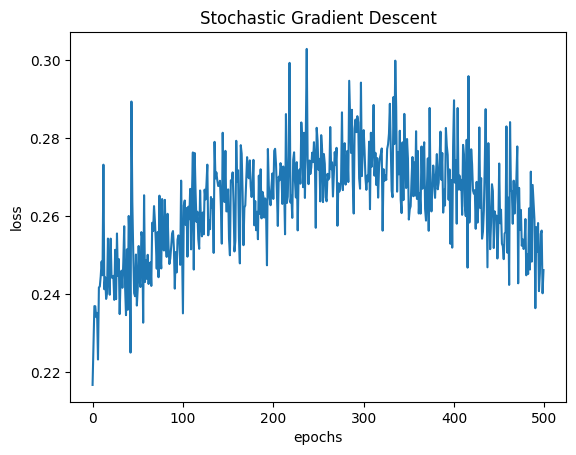

In [34]:
plt.ylabel("loss")
plt.xlabel("epochs")
plt.plot(stochastic_history.history['loss'])
plt.title("Stochastic Gradient Descent")

### Batch Gradient Descent:
* **Smooth Decrease:** The loss function generally shows a smooth and consistent decrease because the gradient is computed over the entire dataset.
* **Stable Convergence:** The updates to the weights are averaged over all training examples, leading to stable and predictable steps toward the minimum.
* **Global Trends:** More likely to follow the overall trend of the loss surface, making it easier to identify the global minimum.

### Stochastic Gradient Descent (SGD):
* **Noisy Decrease:** The loss function can fluctuate significantly because the gradient is computed using a single training example at a time.
* **Frequent Updates:** The weights are updated more frequently, leading to rapid, albeit erratic, changes in the loss.
* **Escaping Local Minima:** The noise in the loss function can help escape local minima, potentially leading to better overall solutions.
* **Faster Initial Progress:** Often shows faster initial convergence because it makes many small updates quickly.

# Difference between Batch and Stochastic Gradient Descent

### 1. Update Frequency:
* **Batch Gradient Descent**: Updates weights after computing the gradient of the entire dataset.
* **Stochastic Gradient Descent**: Updates weights after computing the gradient of each individual training example.

### 2. Convergence Speed:
* **Batch Gradient Descent**: Slower convergence due to fewer updates.
* **SGD**: Faster convergence due to more frequent updates, which helps in quicker learning.

### 3. Computation Time:
* **Batch Gradient Descent**: High computation time per update since it processes the entire dataset.
* **SGD**: Lower computation time per update as it processes one example at a time.

### 4. Stability:
* **Batch Gradient Descent**: More stable and smooth convergence due to averaging over the entire dataset.
* **SGD**: Less stable, noisier convergence due to high variance in updates from individual examples.

### 5. Memory Usage:
* **Batch Gradient Descent**: Requires more memory to store the entire dataset.
* **SGD**: Requires less memory as it processes one example at a time.

### 6. Scalability:
* **Batch Gradient Descent**: Less scalable for very large datasets.
* **SGD**: More scalable for very large datasets due to its lower memory requirements and frequent updates.

# Mini-Batch Gradient Descent (Intermediate Approach)

* **Combines Both:** Uses a subset of the training data (mini-batch) to compute the gradient, balancing the smoothness of batch gradient descent with the frequent updates of SGD.
* **Reduced Noise:** Less noisy than pure SGD, but more responsive than batch gradient descent.
* **Efficient and Stable:** Often preferred in practice for its balance between computational efficiency and stable convergence.

In [35]:
# Stochastic Gradient Descent

model.compile(loss='binary_crossentropy',metrics=['accuracy'])
minibatch_history = model.fit(X_scaled,y,epochs=500,batch_size=50,validation_split=0.2)

Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9019 - loss: 0.2680 - val_accuracy: 0.9125 - val_loss: 0.3325
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9259 - loss: 0.2101 - val_accuracy: 0.9250 - val_loss: 0.3403
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9358 - loss: 0.1680 - val_accuracy: 0.9125 - val_loss: 0.3514
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9047 - loss: 0.2504 - val_accuracy: 0.9125 - val_loss: 0.3534
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9281 - loss: 0.1865 - val_accuracy: 0.9250 - val_loss: 0.3296
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9104 - loss: 0.2115 - val_accuracy: 0.9125 - val_loss: 0.3582
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9214 - loss: 0.2024 - val_accuracy: 0.9125 - val_loss: 0.3748
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9139 - loss: 0.2221 - val_accuracy: 0.9125 - val_loss: 0.3679

Text(0.5, 1.0, 'Mini Batch Gradient Descent')

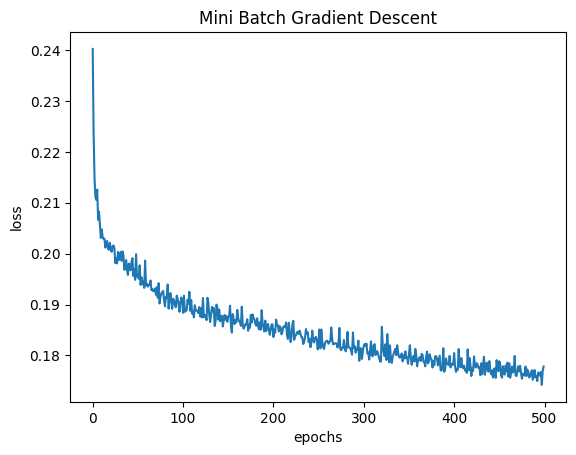

In [36]:
plt.ylabel("loss")
plt.xlabel("epochs")
plt.plot(minibatch_history.history['loss'])
plt.title("Mini Batch Gradient Descent")

# Advantages of mini-batch gradient descent:

**1. Balance of Efficiency and Stability:**
Combines the computational efficiency of SGD with the stability of batch gradient descent.

**2. Faster Convergence:**
More updates per epoch than batch gradient descent, leading to faster convergence than batch methods.

**3. Reduced Noise:**
Less noisy updates compared to pure SGD, leading to more stable convergence.

**4. Memory Efficiency:**
Requires less memory than batch gradient descent as only a subset of data is loaded at a time.

**5. Parallelism:**
Enables the use of optimized matrix operations and parallel processing, enhancing computational efficiency.

**6. Generalization:**
Potentially better generalization as the mini-batch introduces some noise, helping to escape local minima.

**7. Scalability:**
Scales well with large datasets, making it suitable for real-world applications.